# Module 03

## Session 06 Model Performance, Evaluation Method and Hyperparameter Tuning

# Model Evaluation 1

Analyze data 'bankloan.csv'
* employ, debtinc, creddebt, othdebt, as Features
* default as Target

Random state 2020, splitting 80:20 stratified
1. modeling compute accuracy, recall, and another metrics using Stratified CV 5 fold:
    a. logistic regression (solver liblinear)
    b. KNN (k=5)
    c. tree (criterion entropy, max depth 5)
2. compute recall, precision, f1 score and make ROC, PRC from logistic regression(solver liblinear) in test
3. simple hyperparameter tuning: (optimize C) optimized by f1 and using training 60%, validation 20%, test 20%
4. compare the result (before and after)
5. Grid Search CV hyperparameter tuning: (optimize C and max iter) optimized by f1 and using stratified CV 5 fold
6. compare the result (before and after)

# Library

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

# Data

In [2]:
bankloan = pd.read_csv('datasets/bankloan.csv')
bankloan.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


# Data Splitting

In [3]:
X = bankloan[['employ', 'debtinc', 'creddebt', 'othdebt']]
y = bankloan['default']

In [7]:
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X,
    y,
    stratify=y,
    test_size=0.2,
    random_state=2020
)

# Modeling

In [6]:
logreg = LogisticRegression(solver='liblinear', random_state=2020)
knn = KNeighborsClassifier(n_neighbors=5)
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2020)

## Validation

In [8]:
skf = StratifiedKFold(n_splits=5)

logreg_cv = cross_val_score(logreg, X_trainval, y_trainval, cv=skf)

In [12]:
print('cross validation result: ', logreg_cv)
print('cross validation result mean: ', logreg_cv.mean())
print('cross validation result standard deviation: ', logreg_cv.std())


cross validation result:  [0.79464286 0.79464286 0.83928571 0.79464286 0.77678571]
cross validation result mean:  0.8
cross validation result standard deviation:  0.020824828195876083


In [13]:
knn_cv = cross_val_score(knn, X_trainval, y_trainval, cv=skf)

print('cross validation result: ', knn_cv)
print('cross validation result mean: ', knn_cv.mean())
print('cross validation result standard deviation: ', knn_cv.std())

cross validation result:  [0.75       0.71428571 0.75892857 0.77678571 0.71428571]
cross validation result mean:  0.7428571428571429
cross validation result standard deviation:  0.024872121923543065


In [14]:
tree_cv = cross_val_score(tree, X_trainval, y_trainval, cv=skf)

print('cross validation result: ', tree_cv)
print('cross validation result mean: ', tree_cv.mean())
print('cross validation result standard deviation: ', tree_cv.std())

cross validation result:  [0.83035714 0.75       0.8125     0.75892857 0.76785714]
cross validation result mean:  0.7839285714285714
cross validation result standard deviation:  0.031642937761909566


In [15]:
def model_evaluation(model, metrics):
    skf = StratifiedKFold(n_splits=5)
    model_cv = cross_val_score(model, X_trainval, y_trainval, cv=skf, scoring=metrics)

    print('cross validation result: ', model_cv)
    print('cross validation result mean: ', model_cv.mean())
    print('cross validation result standard deviation: ', model_cv.std())

In [16]:
model_evaluation(logreg, 'recall')

cross validation result:  [0.5        0.31034483 0.5862069  0.44827586 0.48275862]
cross validation result mean:  0.46551724137931033
cross validation result standard deviation:  0.08992003317520893


In [17]:
model_evaluation(knn, 'recall')

cross validation result:  [0.4        0.31034483 0.37931034 0.24137931 0.27586207]
cross validation result mean:  0.3213793103448276
cross validation result standard deviation:  0.06021759987018779


In [18]:
model_evaluation(tree, 'recall')

cross validation result:  [0.63333333 0.27586207 0.44827586 0.17241379 0.4137931 ]
cross validation result mean:  0.38873563218390805
cross validation result standard deviation:  0.1571855785912194


In [19]:
model_evaluation(logreg, 'f1')

cross validation result:  [0.56603774 0.43902439 0.65384615 0.53061224 0.52830189]
cross validation result mean:  0.543564482325905
cross validation result standard deviation:  0.06927688261828344


In [20]:
model_evaluation(knn, 'f1')

cross validation result:  [0.46153846 0.36       0.44897959 0.35897436 0.33333333]
cross validation result mean:  0.3925651491365777
cross validation result standard deviation:  0.05222479352609521


In [21]:
model_evaluation(tree, 'f1')

cross validation result:  [0.66666667 0.36363636 0.55319149 0.27027027 0.48      ]
cross validation result mean:  0.46675295798700056
cross validation result standard deviation:  0.13917691859588774


# Model Performance in Test Set

In [22]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_trainval, y_trainval)

LogisticRegression(solver='liblinear')

In [23]:
y_pred = logreg.predict(X_test)

In [24]:
print('recall', recall_score(y_test, y_pred))
print('precidion', precision_score(y_test, y_pred))
print('f1 score', f1_score(y_test, y_pred))

recall 0.4864864864864865
precidion 0.782608695652174
f1 score 0.6000000000000001


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       103
           1       0.78      0.49      0.60        37

    accuracy                           0.83       140
   macro avg       0.81      0.72      0.75       140
weighted avg       0.82      0.83      0.81       140



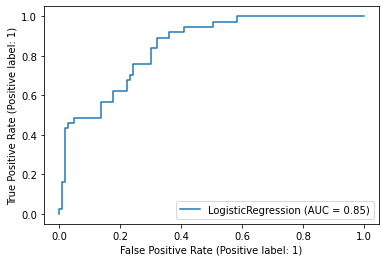

In [26]:
plot_roc_curve(logreg, X_test, y_test)

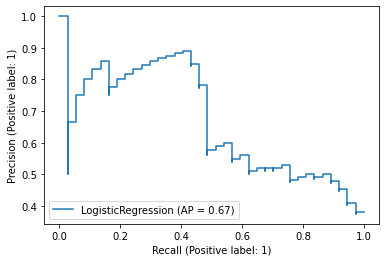

In [28]:
plot_precision_recall_curve(logreg, X_test, y_test)

# Simple Hyperparameter for Logistic Regression

In [29]:
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval,
    y_trainval,
    stratify=y_trainval,
    test_size=0.25,
    random_state=2020
)

In [47]:
hyperparam_c = [1000,100,10,1,0.1,0.01,0.001,0.0001]
best_score = 0
val_score = []

for i in hyperparam_c:
    # fitting model
    logreg = LogisticRegression(solver='liblinear', C=i, random_state=2020)
    logreg.fit(X_train, y_train)

    # score
    y_pred_val = logreg.predict(X_val)
    score_tmp = f1_score(y_val, y_pred_val)

    # best score
    if score_tmp > best_score:
        best_score = score_tmp
        best_param = i

In [48]:
print('best score: ', best_score)
print('best hyperparameter: ', best_param)

best score:  0.631578947368421
best hyperparameter:  0.01


# Comparison Before & After Tuning

In [49]:
logreg_after = LogisticRegression(solver='liblinear', C=0.01)
logreg_before = LogisticRegression(solver='liblinear', C=1)

In [53]:
logreg_before.fit(X_trainval, y_trainval)

LogisticRegression(C=1, solver='liblinear')

In [54]:
y_pred = logreg_before.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       103
           1       0.78      0.49      0.60        37

    accuracy                           0.83       140
   macro avg       0.81      0.72      0.75       140
weighted avg       0.82      0.83      0.81       140



In [55]:
logreg_after.fit(X_trainval, y_trainval)
y_pred = logreg_after.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       103
           1       0.56      0.49      0.52        37

    accuracy                           0.76       140
   macro avg       0.69      0.68      0.68       140
weighted avg       0.75      0.76      0.76       140



## Concl

1. no improvement after tuning
2. range hyperparameter could be not suitable for this model
3. data could be hard to predict

# Hyperparameter for Logistic Regeression with Grid Search (crossvalidation)

In [59]:
hyperparam_c = {
    'C':[1000,500,100,50,100,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001],
    'max_iter':[100,200,300,400,500,600,700,800,900,1000]
}
skf = StratifiedKFold(n_splits=5)
logreg = LogisticRegression(solver='liblinear')

grid_search = GridSearchCV(
    logreg,
    param_grid=hyperparam_c,
    cv=skf,
    scoring='f1',
    n_jobs=-1
)

In [60]:
grid_search.fit(X_trainval, y_trainval)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [1000, 500, 100, 50, 100, 5, 1, 0.5, 0.1, 0.05,
                               0.01, 0.005, 0.001, 0.0005, 0.0001],
                         'max_iter': [100, 200, 300, 400, 500, 600, 700, 800,
                                      900, 1000]},
             scoring='f1')

In [61]:
grid_search.best_params_

{'C': 0.05, 'max_iter': 100}

In [62]:
grid_search.best_score_

0.5563225088777649

In [65]:
cv_result = pd.DataFrame(grid_search.cv_results_)
cv_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001963,0.000297,0.001349,0.000258,1000,100,"{'C': 1000, 'max_iter': 100}",0.576923,0.47619,0.653846,0.530612,0.538462,0.555207,0.058873,11
1,0.003818,0.001327,0.002404,0.000775,1000,200,"{'C': 1000, 'max_iter': 200}",0.576923,0.47619,0.653846,0.530612,0.538462,0.555207,0.058873,11
2,0.002237,0.000999,0.001444,0.000704,1000,300,"{'C': 1000, 'max_iter': 300}",0.576923,0.47619,0.653846,0.530612,0.538462,0.555207,0.058873,11
3,0.001455,0.000218,0.000941,0.000080,1000,400,"{'C': 1000, 'max_iter': 400}",0.576923,0.47619,0.653846,0.530612,0.538462,0.555207,0.058873,11
4,0.001980,0.000857,0.001276,0.000712,1000,500,"{'C': 1000, 'max_iter': 500}",0.576923,0.47619,0.653846,0.530612,0.538462,0.555207,0.058873,11


In [66]:
cv_result[cv_result['rank_test_score']<3]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
90,0.002416,0.000809,0.001743,0.000987,0.05,100,"{'C': 0.05, 'max_iter': 100}",0.528302,0.530612,0.607143,0.56,0.555556,0.556323,0.028436,1
91,0.001729,0.000864,0.001283,0.000735,0.05,200,"{'C': 0.05, 'max_iter': 200}",0.528302,0.530612,0.607143,0.56,0.555556,0.556323,0.028436,1
92,0.001788,0.001112,0.001510,0.001123,0.05,300,"{'C': 0.05, 'max_iter': 300}",0.528302,0.530612,0.607143,0.56,0.555556,0.556323,0.028436,1
93,0.002157,0.001336,0.001790,0.000835,0.05,400,"{'C': 0.05, 'max_iter': 400}",0.528302,0.530612,0.607143,0.56,0.555556,0.556323,0.028436,1
94,0.001414,0.000747,0.001278,0.000717,0.05,500,"{'C': 0.05, 'max_iter': 500}",0.528302,0.530612,0.607143,0.56,0.555556,0.556323,0.028436,1
95,0.001032,0.000130,0.000699,0.000067,0.05,600,"{'C': 0.05, 'max_iter': 600}",0.528302,0.530612,0.607143,0.56,0.555556,0.556323,0.028436,1
96,0.001890,0.001178,0.001186,0.000837,0.05,700,"{'C': 0.05, 'max_iter': 700}",0.528302,0.530612,0.607143,0.56,0.555556,0.556323,0.028436,1
97,0.001771,0.000987,0.000952,0.000263,0.05,800,"{'C': 0.05, 'max_iter': 800}",0.528302,0.530612,0.607143,0.56,0.555556,0.556323,0.028436,1
98,0.001200,0.000518,0.001316,0.001279,0.05,900,"{'C': 0.05, 'max_iter': 900}",0.528302,0.530612,0.607143,0.56,0.555556,0.556323,0.028436,1
99,0.001110,0.000227,0.000816,0.000281,0.05,1000,"{'C': 0.05, 'max_iter': 1000}",0.528302,0.530612,0.607143,0.56,0.555556,0.556323,0.028436,1


# Comparison Before & After Tuning

In [67]:
logreg_after = LogisticRegression(solver='liblinear', C=0.05, random_state=2020)
logreg_before = LogisticRegression(solver='liblinear', C=1, random_state=2020)

In [68]:
logreg_before.fit(X_trainval, y_trainval)
y_pred = logreg_before.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       103
           1       0.78      0.49      0.60        37

    accuracy                           0.83       140
   macro avg       0.81      0.72      0.75       140
weighted avg       0.82      0.83      0.81       140



In [69]:
logreg_after.fit(X_trainval, y_trainval)
y_pred = logreg_after.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       103
           1       0.68      0.51      0.58        37

    accuracy                           0.81       140
   macro avg       0.76      0.71      0.73       140
weighted avg       0.80      0.81      0.80       140



## concl

1. no improvement after tuning
2. range hyperparameter could be not suitable for this model
3. data could be hard to predict